 # Assignment 4:
* Mihir Patil
* Swaroop Bhandary
* Erick Kramer

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

## Consistent learner

A learner is consistent if it outputs hypotheses that perfectly fit the training data, whenever possible. It is quite reasonable to ask that a learning algorithm be consistent, given that we typically prefer a hypothesis that fits the training data over one that does not.

Write a consistent learner for Hr from last Exercise (i.e. Hr = {((a < x < b)⋀(c < y < d)) | a, b,c, d ∈ IR } ). Generate a variety of target concept rectangles at random, corresponding to different rectangles in the plane. Generate random examples of each of these target concepts, based on a uniform distribution of instances within the rectangle from (0,0) to (100, 100).

In [2]:
class Rectangle:
    def __init__(self, max_width, max_height):
        self.max_height = max_height
        self.max_width = max_width
    
    def randomRectangles(self):
        self.pointA_x = random.randint(1,25)
        self.pointA_y = self.pointA_x
        self.randomHeight = random.randint(5,self.max_height)
        self.randomWidht = random.randint(5,self.max_width)
        
        print('Rectangle with an origin at {},{} and height of {} and widht of {}'\
                          .format(self.pointA_x, self.pointA_y,self.randomHeight, \
                                  self.randomWidht))       
        return plt.Rectangle((self.pointA_x,self.pointA_y), self.randomWidht, \
                             self.randomHeight, angle=0.0, \
                             facecolor='none', edgecolor='r', linewidth=3)
    
    def dataInsideRectangle(self):
        dataX = np.random.uniform(self.pointA_x + 1,self.pointA_x + self.randomWidht \
                                  - 1 ,10)
        dataY = np.random.uniform(self.pointA_y + 1,self.pointA_y + self.randomHeight \
                                  - 1,10)
        return dataX, dataY
    
    def dataOutsideRectangle(self):
        # Outter limits of the data
        eastLimit = self.pointA_x - 5
        southLimit = self.pointA_y - 5
        westLimit = self.pointA_x + self.randomWidht + 5
        northLimit = self.pointA_y + self.randomHeight + 5
        
        # Limits surrounding the rectangle
        eastBorder = self.pointA_x - 2
        southBorder = self.pointA_y - 2
        westBorder = self.pointA_x + self.randomWidht + 2
        northBorder = self.pointA_y + self.randomHeight + 2
        
        dataXEast = np.random.uniform(eastLimit, eastBorder, 10)
        dataYEast = np.random.uniform(southLimit, northLimit, 10)
        
        dataXSouth = np.random.uniform(eastLimit, westLimit, 10)
        dataYSouth = np.random.uniform(southLimit, southBorder, 10)
        
        dataXWest = np.random.uniform(westBorder, westLimit, 10)
        dataYWest = np.random.uniform(southLimit, northLimit, 10)
        
        dataXNorth = np.random.uniform(eastLimit, westLimit, 10)
        dataYNorth = np.random.uniform(northBorder, northLimit, 10)
        
        dataX = np.hstack((dataXEast, dataXSouth, dataXWest, dataXNorth))
        dataY = np.hstack((dataYEast, dataYSouth, dataYWest, dataYNorth))
        
        return dataX, dataY
    
    def addLabels(self):
        # Label for the concept rectangle
        plt.annotate('c', (self.pointA_x, self.pointA_x + self.randomHeight +0.5))

Rectangle with an origin at 14,14 and height of 6 and widht of 18


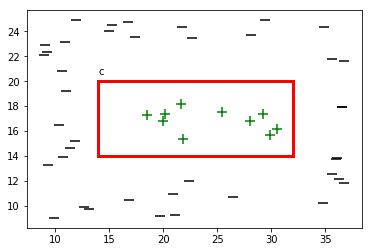

In [43]:
rect = Rectangle(20,10)
# Generate random rectangle
rec = rect.randomRectangles()
# Generate data inside the rectangle
dataX_in, dataY_in = rect.dataInsideRectangle()

# Generate data outside the rectangle
dataX_out, dataY_out = rect.dataOutsideRectangle()

# Plot rectangle
plt.axes()

rect.addLabels()
plt.scatter(dataX_in, dataY_in, marker='+', c='g',s=100)
plt.scatter(dataX_out, dataY_out, marker='_', c='k',s=100)
plt.gca().add_patch(rec)
plt.axis('auto')
# plt.xlim(0,40)
# plt.ylim(0,40)
plt.show()

Plot the generalization error as a function of the number of training examples, m. On the same graph, plot the theoretical relationship between e and m, for d = .95. Does theory fit experiment?

Consider training a two-input perceptron. Give an upper bound on the number of training examples sufficient to assure with 90%  confidence that the learned perceptron will have true error of at most 5%. Does this bound seem realistic?

In [ ]:
# We want the number of training examples 
# We need the true error to be 5% with a confidence of 90% =  (1 - \etha)
# Need the VC dimension of a two-input perceptron O(W log W)
# True error is the error calculated w.r.t. to the data distribution
# Upperbounding is for instance 
# Testerror <= TrainError (Test error is upperbounded by the training error)
# Maybe PAC Learning theory could help
# ----- We need the number of hypothesis H 
m >= (1/epsilon)((ln H) + ln(1/delta))
m >= (1/0.05)((ln H) + ln(1/0.05))


Consider the class C  of concepts of the form (a <= x <= b) AND (c<=y <= d),  where a ,b , c , and d  are integers in the interval (0,99). Note each concept in this class correspondsto a rectangle with integer-valued boundaries on a portion of the x, y  plane. Hint: Given a region in the plane bounded by the points (0,0)  and (n -1 , n - I),  the number of distinct rectangles with integer-valued boundaries within this region is 1/4 *  n(n+1)^2


a.  Give an upper bound on the number of randomly drawn training examples sufficient to assure that for any target concept c  in C,  any consistent learner using H = C  will, with probability 95%, output a hypothesis with error at most 0.15 !

b. Now suppose the rectangle boundaries a, b, c,  and d  take on real values instead of integer values. Update your answer to the first part of this question.